# The numpy.random package
---

## Randomness

Randomness is generally thought of as the unpredictability of an event’s outcome ahead of time<sup id="a1">[1](#f1)</sup>. Even if one outcome is more likely than another, we cannot be certain which outcome will happen until we observe it. This randomness is the basis of many common games of chance, such as flipping a coin or rolling dice. 

## NumPy's Random Module

In data science, we will want sometimes want to generate random data for the purposes of simulation<sup id="a2">[2](#f2)</sup>. This can save time. For example, it is much faster to code and run a simulation of a million coin tosses than to physically toss a coin a million times. We can also use simulated data to test and refine models, or to supplement existing data. Random data simulation has also been proposed as a solution to a problem in medical scientific research, where data is often not open due to concerns about patient confidentiality[x]. A compromise is to simulate the patient data so that the simulated dataset is statistically identical to the original. These “synthetic” datasets can then be open to the public, with any potential identifying variables hidden by the randomising process [X].

Since computing is completely deterministic, it would be incredibly difficult for one to generate truly random data[x]. However, the outcome of an event appearing random to an observer might not be due to the fact multiple outcomes are possible. The outcome might instead appear random due to the observer’s ignorance. If the observer had all the relevant information about an event, they would be able to perfectly state the outcome ahead of time, but if they lack the relevant information, then other outcomes might appear equally plausible. Computers take advantage of this ignorance of the user with pseudo-random number generators (PRNGs) [x]. The coding is completely deterministic, but if the user lacks necessary information about how the algorithm works, then the outcome is considered random from the user’s perspective.

While python has a built-in random module, a more powerful alternative is provided by NumPy’s random module. NumPy is a package that allows for fast calculations with arrays[x]. This feature extends to the generation of random values, where NumPy random can quickly generate not only single random values, but can also generate random arrays. As noted by Wes McKinney when discussing NumPy’s random module, “Python’s built-in random module, by contrast, only samples one value at a time… (and) numpy.random is well over an order of magnitude faster for generating very large samples”[x]. This makes NumPy a more powerful choice when it comes to generating larger random datasets for simulations. Many of NumPy random’s methods will now be discussed in turn. 


To use the numpy.random module, we first need to import numpy, which by convention is generally imported as np. To visualise some of the random data that will be generated, matplotlib.pyplot will also be imported to generate plots of the data. A magic command has also been added as it helps to display plot within a notebook[x].

In [1]:
# Package for numerical calculations and arrays
import numpy as np

# Generating plots
import matplotlib.pyplot as plt

# A magic command for helping display matplotlib plots in notebooks
%matplotlib inline

The numpy.random documentation recommends that before calling on any methods, that a new generator is called using the default PRNG, which can be done with the following code. The varible that points to this code will be used throughout to call on numpy.random's functions. 

The sections below will begin with the structure of the code needed to run each function, as presented in the numpy.random v1.21 documentation. For example, the code presented for the integers function is random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False). This means that to run our code we will use the variable assigned to our random generator followed by a period and the function name, then followed by parantheses which contain the arguments that we wish use. Arguments without equal signs are neccessary and must be passed, otherwise the code will not runreturn an error. Arguments with equal signs are optional. If these are not passed by the user, then numpy.random will just use default values for these arguments. 

In [2]:
# Construct a new Generator with the default BitGenerator (PCG64)
rng = np.random.default_rng()

## "Simple Random Data" Functions
---------------------------------

There are four ‘Simple Random Data’ functions for the fast generation of random data. 

### **integers**

random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)

The integers function is used for the generation of integers, from a single integer to entire arrays. If only a single number is passed as an argument, the function will generate an integer between 0 and the number entered, with the higher number exclusive. In the example below, as 3 is entered as the argument, the randomly generated integer will be either 0, 1, or 2. 

In [15]:
# Generate a single integer.

random_int = rng.integers(3)
random_int

2

If we do not enter a number, the code will not work, and will return an error message that at least one argument needs to be given.

In [14]:
# This will return an error as no argumentshave been passed.
rng.integers()

TypeError: integers() takes at least 1 positional argument (0 given)

We can generate more than one number by specifying the size. For the below example, entering the size as 20 will result in 20 random intergers being returned in an array.

In [12]:
# Generates an array of 20 random integers from 0-4 (5 not inclusive).
rng.integers(5, size = 20)

array([2, 3, 3, 0, 2, 3, 4, 4, 0, 1, 4, 1, 0, 0, 2, 3, 3, 3, 1, 1],
      dtype=int64)

It is worth noting that running the same code again will lead to a brand new array of 20 random numbers. 

In [19]:
# Generates an array of 20 random integers from 0-4 (5 not inclusive).
random_integers2 = rng.integers(5, size = 20)
random_integers2

array([1, 4, 2, 0, 4, 4, 0, 2, 0, 2, 1, 1, 3, 0, 1, 4, 4, 0, 4, 3],
      dtype=int64)

While we do not need to assign variables for the code to work, by doing so we can reuse this array further in our code should we wish to do so. However, once the session is closed and the code is rerun at a later time, a new random array will be created and stored to the variable, with the original instance lost. If we want a random array that is consistantly reproducable, this will be dealt with in the section on seeding.

In [20]:
# Recalling the variable to see the randomly generated array produced earlier
random_integers2

array([1, 4, 2, 0, 4, 4, 0, 2, 0, 2, 1, 1, 3, 0, 1, 4, 4, 0, 4, 3],
      dtype=int64)

We can specify the lowest and highest random numbers that can be selected. In this instance the lowest number is 10, which is inclusive. High being 25 means 24 is the highest number, as high is exclusive. We can also create a multidimensional array by specifying the size. In this instance size=(2,4) returns a 2x4 array

In [22]:
# Generate a random 2x4 array of numbers between 10 and 24.
rng.integers(low=10, high=25, size=(2,4))

array([[13, 11, 21, 24],
       [15, 15, 18, 15]], dtype=int64)

### **random**

random.Generator.random(size=None, dtype=np.float64, out=None)

The random function is used to return floating point numbers between 0.0 and 1.0.

Unlike with the integers function, random will work without passing an argument. If we do this, it will return a single floating point value betweeen 0.0 and 1.0.

In [17]:
# Generate a single random float between 0.0 and 1.0.
rng.random()

0.4030250832620421

If we need more than one random float, we can do this by specifying the size to the amount of random numbers we would like returned.

In [25]:
# Returns 20 random floats between 0.0 and 1.0
rng.random(size = 20)

array([0.42194249, 0.71796406, 0.90449519, 0.3701903 , 0.90314291,
       0.18178279, 0.40685708, 0.48607531, 0.70358656, 0.25475897,
       0.52509826, 0.66945978, 0.68440788, 0.00480666, 0.70213566,
       0.80814029, 0.76746261, 0.97993985, 0.86184173, 0.65302608])

Multidimensional arrays can be generated by adding more than one value to the size argument in parentheses.

In [23]:
# Create 3 random arrays of 5 floats between 0.0 and 1.0
rng.random(size = (3, 5))

array([[0.32252695, 0.60957133, 0.92386631, 0.36566726, 0.78803775],
       [0.59752522, 0.3206327 , 0.5059239 , 0.49500167, 0.31047462],
       [0.78570488, 0.79939203, 0.35872539, 0.11047249, 0.29907112]])

Since the power of NumPy is in fast calculations with arrays, we can take advantage of this to create random arrays of values greater than 1.0. The example below multiplies the randomly generated floats by 10 before returning the array to us.

In [24]:
# Multiplying a randomly created array of floats by 10.
10 * rng.random(size = 5)

array([5.8246178 , 4.13706449, 3.47690347, 2.1961966 , 2.29567561])

### **choice**

random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

The choice function takes an array as an argument, and returns random values from that array to the user based on the parameters passed in by the user. Entering a single integer as an arguments means choice will select a random integer in the range of numbers from 0 up to the entered number.

In [30]:
# Chooses a random number between 0 and 5 to return to the user
rng.choice(5)

3

We can ask choice to return more values by specifying them alongside the initial number. In the below example, (10,3) means the cdode will return 3 numbers between 0 and 10. 

In [29]:
# Takes 10 as an input and then selects 3 random ints up to 10
rng.choice(10, 3)

array([2, 9, 5], dtype=int64)

In the above examples, the exact same outcome can be achieved by using the integers function. The below examples show where choice differs. For example, we can pass in a list of strings and ask choice to return a random item from that list to us. If we have a list of colours, and then pass that list as an argument using choice, we will get one colour randomly returned. 

In [31]:
# A list of colours
colours = ["red", "blue", "green", "black", "yellow"]

# Using choice to randomly pick a colour
rng.choice(colours)

'blue'

We can again get more than one value returned by specifying the size. By default, when selecting multiple items from a list, choice will replace the item chosen each time. That is to say, if we have 5 items in a list and choice picks one, the chosen item will be returned to the list where it can potentially be chosen again. If we don't want this to happen, we can set replacement to false. This means that when something is randomly chosen from our 5 item list, the chosen item will not be returned and cannot be selected again, meaning only one of the remaining 4 items from the list can be chosen. 

In [32]:
# Selecting 3 random colours without replacement. 
rng.choice(colours, size= 3, replace=False)

array(['red', 'yellow', 'blue'], dtype='<U6')

We can add probabilitys to bias the outcome chosen in certain directions. With our list of colors, we can bias the outcome by adding an array of values with the same amount of values as there are items in our list, which in this instance is 5. The values of p should add to 1. With the last value being the highest at 0., this means the last item in our list (yellow), is more likely to be randomly chosen, followed by black with a value of 0.3. The remaining items may still be chosen, but will not be chosen as frquently were the code run multiple times. 

In [33]:
# Select two colours randomly with replacement and a biased outcome
rng.choice(colours, size=2, p = np.array([0.1, 0.1, 0.1, 0.3, 0.4]))

array(['red', 'yellow'], dtype='<U6')

### **bytes**

random.Generator.bytes(length)

The bytes function only takes a single argument, and returns random bytes of the length passed. Random byte generation can be used in cryptography. However, the NumPy documentation warns against using the random package for security purposes[x].

In [34]:
# Return 5 random bytes
rng.bytes(5)

b'\xb7\xb3\x85\xdf2'

## "Permutations" functions
---

The three Permutation methods can all be used for the random rearranging of items within an array.

### **shuffle**

random.Generator.shuffle(x, axis=0)

The shuffle function takes in an a sequence or an array and returns everything in a new random order. Below we will create a variable containing the integers from 0-9 that we will then shuffle.

In [36]:
# Assign the range 0-9 (10 not inclusive) to the variable digits
digits = np.arange(10)
digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
# Shuffle the array digits
rng.shuffle(digits)

Of note is that the shuffle function will alter the order of an array in place, which changes the contents of a variable. This means in this instance that the variable digits will no longer point to the array ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]). Rather, it will return the order they were shuffled into.

In [38]:
# Returnn the shuffled array
digits

array([7, 3, 0, 8, 9, 6, 2, 1, 4, 5])

Shuffle can also be used to randomly reorder a list containing strings. 

In [44]:
# Create a list of strings for the digits 0-9
string_digits = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
string_digits

['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [46]:
# Shuffle the list of strings and return it
rng.shuffle(string_digits)
string_digits

['four', 'two', 'five', 'eight', 'three', 'one', 'six', 'seven', 'nine']

Shuffle can also be used to randomly reorder arrays, but it should be noted that the reordering will only take place along one dimension at a time. This means that shuffle can change the order of a row or a column, but it will not shuffle an item to both a new row and a new column at the same time.

In [47]:
# Create a 3x3 array containing 0-8
three_by_three = np.arange(9).reshape(3, 3)
three_by_three

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

By default, using shuffle on an array will rearrange the position of rows but will leave the items from each row in the original order

In [48]:
rng.shuffle(three_by_three)
three_by_three

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

However, if we set the axis to 1 as an argument, shuffle will instead change the order of the columns rather than rows.

In [50]:
# Generating a random 5x5 array
five_by_five = rng.integers(low=1, high=7, size = (5,5))
five_by_five

array([[6, 3, 6, 2, 5],
       [6, 4, 3, 4, 6],
       [3, 2, 5, 3, 1],
       [1, 1, 5, 1, 1],
       [3, 3, 2, 4, 6]], dtype=int64)

In [51]:
# Randomly shuffle the order of the 5x5's columns
rng.shuffle(five_by_five, axis=1)
five_by_five

array([[3, 2, 6, 5, 6],
       [4, 4, 3, 6, 6],
       [2, 3, 5, 1, 3],
       [1, 1, 5, 1, 1],
       [3, 4, 2, 6, 3]], dtype=int64)

### **permutation**

random.Generator.permutation(x, axis=0)

The permutation function will also return the entire contents of an array or list that has been passed to it in a new random order, but unlike shuffle, permutation will leave the original array intact and unchanged.

In [24]:
# Assign the range 0-9 (10 not inclusive) to the variable digits2
digits2 = np.arange(10)
digits2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
# Return the digits list in a new, random order
rng.permutation(digits2)

array([2, 9, 6, 7, 1, 3, 5, 4, 8, 0])

In [26]:
# The original order of the variable digits2 is unchanged
digits2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

By default, permutation will rearrange multidimensional arrays in a similar manner to shuffle - it will move entire rows to a new position, but leave the order within each row unchanged.

In [52]:
# A 6x6 array
six_by_six = np.arange(36).reshape(6,6)
six_by_six

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [53]:
# Randomly reorder the 6x6 array with permutation.
rng.permutation(six_by_six)

array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [12, 13, 14, 15, 16, 17],
       [ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [18, 19, 20, 21, 22, 23]])

Permutation performs different to shuffle when axis is set to 1, however. While setiing to axis to 1 when using shuffle would move entre columns, in permutation it will instead shuffle the contents within each row, but leave each row in its original position. 

In [90]:
# Shuffle the order of the contents of each row in the 6x6 array
rng.permutation(six_by_six, axis=1)

array([[ 5,  2,  3,  4,  0,  1],
       [11,  8,  9, 10,  6,  7],
       [17, 14, 15, 16, 12, 13],
       [23, 20, 21, 22, 18, 19],
       [29, 26, 27, 28, 24, 25],
       [35, 32, 33, 34, 30, 31]])

### **permuted**

random.Generator.permuted(x, axis=None, out=None)

The permuted function is a more recent addition, as of numpy 1.20[x]. Permuted is more flexible than either shuffle or permutation. It can be used to rearrange content in-place, like with shuffle, or create a new rearranged copy, like with permutation. By only passing in an array, permuted will leave the original array intact, as permutations does.

In [58]:
# Generate a random 4x4 array.
# Negative random numbers can also be generated.
four_by_four = rng.integers(low=-20, high=-1, size = (4,4))
four_by_four

array([[ -5,  -3,  -5,  -9],
       [-18, -20, -13,  -5],
       [-18, -19,  -9,  -2],
       [ -6, -19,  -8, -16]], dtype=int64)

In [59]:
# Reorder the 4x4 array.
rng.permuted(four_by_four)

array([[ -9, -18,  -3,  -5],
       [-18, -19, -20,  -8],
       [ -5,  -5,  -2, -13],
       [ -9, -19, -16,  -6]], dtype=int64)

In [68]:
# Calling 4x4 to show the original is unchanged.
four_by_four

array([[ -5,  -3,  -5,  -9],
       [-18, -20, -13,  -5],
       [-18, -19,  -9,  -2],
       [ -6, -19,  -8, -16]], dtype=int64)

We can compare and contrast shuffle, permutation, and permuted further by reusing the 3x3 array example from before.

In [69]:
# The 3x3 array of 0-9 that was randomly reordered using shuffle.
three_by_three

array([[5, 6, 0],
       [7, 1, 8],
       [2, 4, 3]])

Permuted will shuffle the values within each row, but leave the rows in place if we set axis to 1. This is similar to using permutation with axis set to 1

In [70]:
# Use permuted to reorder the 3x3 array.
permuted_three_by_three = rng.permuted(three_by_three, axis=1)
permuted_three_by_three

array([[5, 6, 0],
       [8, 1, 7],
       [2, 4, 3]])

Permuted returned a copy, leaving the original array reordered by shuffle unchanged

In [71]:
# Recalling the shuffled 3x3 array
three_by_three

array([[5, 6, 0],
       [7, 1, 8],
       [2, 4, 3]])

However, we can use permuted to overwrite the original array by passing the variable of the original array as an argument using out. If we don't pass in an axis argument, then the output withh be rearranged across both columns and rows, which neither shuffle nor permutation can do.

In [72]:
# Using permuted to change the content of the original 3x3 array
permuted_three_by_three = rng.permuted(three_by_three, out=three_by_three)

We can show that the new permuted 3x3 array and the original now have the same content.

In [73]:
# Calling the 3x3 array
three_by_three

array([[5, 4, 2],
       [7, 3, 0],
       [1, 8, 6]])

In [76]:
# Calling the permuted 3x3 array
permuted_three_by_three

array([[5, 4, 2],
       [7, 3, 0],
       [1, 8, 6]])

In [77]:
# Show that the two 3x3 arrays have the same content
three_by_three is permuted_three_by_three

True

## Distributions
---

A probability distribution shows us the likelihood of different possible occurrences for an event[x]. The probability distribution most relevant to our needs depends on the type of data we’re working with and the expected outcomes. There are times when you have a particular type of data in mind that follows a particular probability distribution that you want to simulate, and to that end NumPy allows you to generate data that matches the parameters of different probability distributions. The section below looks at five of these distributions.

### **binomial**

random.Generator.binomial(n, p, size=None)

A binomial distribution tracks trials and records a binary success/failure outcome of trials. An everyday example of this would be flipping a coin with different faces. The coin can land either head up or tails up. We can use the binomial function to quickly simulate a randomm binomial distrution for events such as coin flips. To do this we need to include two arguments. The first is n, which is the number of trials we want simulated. In this instance, there will be 20 trials, simply meaning there will be 20 simulated coin flips, and then we will receive an output as to the number of heads that were observed. The second is p, which is the probability of success. This must be between 0 and 1. A fair coin has a probability of 0.5, as the coin has an equal chance of landing heads up or tails up. Other binomial observations might have one outcome more likely or more rare than the other. An example of this might be observing the number of penalties scored vs penalties missed in soccer, which should be weighted around 0.7549 in favour of penalties scored[x]. We can finally specify a size, which is how many times the trial is repeated. By setting the size to 100, that means the process of 20 coin flips will be repeated 100 times, giving a total of 2000 coin flips in the simulation. 

In [19]:
# Setting the number of trials
n = 20

# Setting the probablity of success 
p = 0.5

In [20]:
# Generating a rando binomial distribution

coin_flip = rng.binomial(n, p, size=100)

We can take the resulting array as giving us the number of heads after every 20 coin flips

In [21]:
# View the randomly generated array
coin_flip

array([ 9,  9, 11, 14, 14, 11, 12, 10,  9, 10, 11, 13,  9, 10,  9,  8,  6,
        8, 11, 13,  5, 10, 12, 14,  8,  7,  8,  9,  9, 11,  6, 13, 11, 10,
       15, 10,  9, 12, 12, 11, 12,  7, 13,  9, 11,  9, 10, 13,  9, 15, 10,
       13, 10,  9, 12,  9, 12,  9,  9, 12,  9, 12,  8,  8,  7, 12, 12, 12,
       13,  4, 12,  6,  8,  6,  8,  6, 13,  8, 10, 11,  9, 10, 11, 13, 10,
        9, 12, 10, 10, 12, 13, 10, 10, 14, 12,  8, 12,  9,  9, 12],
      dtype=int64)

We can plot the distribution to visualise the generated data. We should expect that the most common outcomes will be close to 10, and that lower and higer outcomes were incresingly unlikely. The output won't be exactly the same every time the code is run, but we should see a similar pattern which makes sense as we should expect a coin to land heads or tails 10 times each after 20 tosses, but we should also expect there will be rarer occasions when one value appeared much more common than the other.

(array([ 2.,  5.,  3., 10., 20., 16., 10., 18., 10.,  6.]),
 array([ 4. ,  5.1,  6.2,  7.3,  8.4,  9.5, 10.6, 11.7, 12.8, 13.9, 15. ]),
 <BarContainer object of 10 artists>)

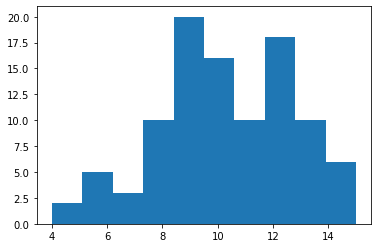

In [22]:
# Plotting the randomly generated data
plt.hist(coin_flip, bins=10)

### **normal**

random.Generator.normal(loc=0.0, scale=1.0, size=None)

The normal (or Gaussian) distribution is a continous continuous probability distribution that is recognisable due to its "bell-shaped curve" appearance[x]. A lot of real world data, such as height, IQ scores, and heartrate fit a normal distribution and a common assumption is that data collected is normally distributed thus allowing extrapolition to wider populations[x]. The distribution centers around the mean, which is where the probability is highest. Around 68% of the data falls within one standard deviation of the mean, 95% within 2 standard deviations of the mean, and 98% falling within 3 standard deviations of the mean, with standard deviation telling us how widely spread the data values are. As such, we can generate a random normal distribution if we know the mean and standard deviation of the data we wish to generate. For the example below a mean, which is often represented by the greek letter mu, is set as 100 and the standard deviation, which is often represented by the Greek letter sigma, is set at 15. Entering a size of 100 means that 100 datapoints are generated.

In [23]:
# Mean
mu = 100

#Standard Deviation
sigma = 15

In [25]:
# A random example of 100 samples from a normal distribution
normal = rng.normal(mu, sigma, size=100)
normal

array([ 95.9747472 , 108.9607879 ,  84.12327242,  87.84064911,
        91.06459696,  96.20392059,  87.79801776, 107.51552443,
        83.5972525 , 126.43806826, 100.70911433, 117.64330229,
        83.79983943,  95.34794981, 102.08714082, 126.71303855,
       101.89899865, 122.66356864,  89.78791633, 123.03017036,
        90.30403789,  73.80291305,  70.85197062, 103.50211466,
        97.16914014, 104.11048728,  99.31821875, 107.72958904,
       124.83175957,  97.37417915, 104.61524946,  94.6153573 ,
        74.53558157,  96.33388445, 123.08445763,  88.33686497,
       135.19667342, 109.14296871, 107.65851116, 114.93223443,
       101.11837698, 101.58744233, 120.99047227,  90.1834798 ,
        98.86041204,  83.25441687, 102.71948843, 146.84071483,
       118.94564841,  87.04462791,  74.57526088, 109.51100531,
       111.65213054,  91.9886217 , 121.2151282 , 107.51631626,
       111.99565891, 112.77070227, 117.90167459,  94.73365987,
        90.91735624, 121.87291087,  99.26214383,  83.13

A smaller sample size generally leads to a plot that vaguely resembles the bell shaped curve the random values were drawn from. We can see this by generating a plot of the data.

(array([1., 0., 0., 0., 1., 1., 2., 0., 0., 0., 1., 7., 0., 3., 4., 5., 4.,
        1., 5., 5., 5., 3., 8., 4., 5., 5., 3., 2., 3., 1., 1., 2., 3., 2.,
        4., 2., 2., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([ 63.76352442,  65.46934146,  67.1751585 ,  68.88097554,
         70.58679259,  72.29260963,  73.99842667,  75.70424371,
         77.41006076,  79.1158778 ,  80.82169484,  82.52751188,
         84.23332893,  85.93914597,  87.64496301,  89.35078005,
         91.0565971 ,  92.76241414,  94.46823118,  96.17404822,
         97.87986527,  99.58568231, 101.29149935, 102.99731639,
        104.70313344, 106.40895048, 108.11476752, 109.82058456,
        111.52640161, 113.23221865, 114.93803569, 116.64385274,
        118.34966978, 120.05548682, 121.76130386, 123.46712091,
        125.17293795, 126.87875499, 128.58457203, 130.29038908,
        131.99620612, 133.70202316, 135.4078402 , 137.11365725,
        138.81947429, 140.52529133, 142.23110837, 143.93692542,
      

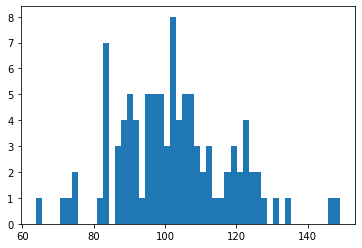

In [26]:
# View the randomly generated normal data
plt.hist(normal, bins = 50)

Use the same mean and standard deviation, but increase the sample size, we can see when the points are ploted that the plot closely resembles a bell shape. 

(array([  2.,   5.,   3.,   4.,   9.,  10.,  22.,  27.,  44.,  56.,  70.,
         99., 152., 182., 226., 289., 327., 386., 434., 465., 465., 538.,
        542., 608., 525., 614., 566., 487., 470., 446., 401., 307., 298.,
        217., 189., 133., 103.,  90.,  56.,  42.,  38.,  13.,  11.,  10.,
          6.,   6.,   3.,   2.,   1.,   1.]),
 array([ 46.94730991,  49.15440206,  51.36149421,  53.56858636,
         55.77567851,  57.98277066,  60.18986281,  62.39695496,
         64.60404711,  66.81113926,  69.0182314 ,  71.22532355,
         73.4324157 ,  75.63950785,  77.8466    ,  80.05369215,
         82.2607843 ,  84.46787645,  86.6749686 ,  88.88206075,
         91.0891529 ,  93.29624505,  95.5033372 ,  97.71042935,
         99.9175215 , 102.12461365, 104.3317058 , 106.53879795,
        108.7458901 , 110.95298225, 113.1600744 , 115.36716655,
        117.5742587 , 119.78135085, 121.988443  , 124.19553515,
        126.4026273 , 128.60971945, 130.8168116 , 133.02390375,
        135.230995

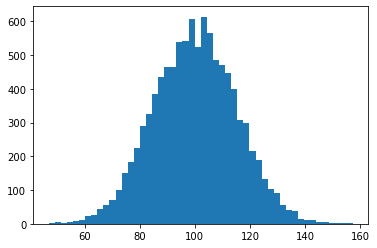

In [28]:
# Generating 10000 random normal distribution datapoints
normal_higher = rng.normal(mu, sigma, 10000)

# Plotting the randomly generated data
plt.hist(normal_higher, bins = 50)

Changing the standard deviation will change the size of the curve that the datapoints are drawn from. A larger standard deviation will make the curve wider and shorter while a smaller one will make the curve narrower and taller.

In [42]:
# Creating new standard deviation points
sigma_wide = 50
sigma_narrow = 7

# Using the new standard deviations to generate random data
normal_wide = rng.normal(mu, sigma_wide, 10000)
normal_narrow = rng.normal(mu, sigma_narrow, 10000)

In [43]:
# View the wider data
normal_wide

array([ 71.86945297, -19.26864812, 124.56661518, ...,  70.64275694,
        73.67671577, 166.6478529 ])

In [44]:
# View the narrower data
normal_narrow

array([ 94.54904996,  95.02867466,  91.04690461, ..., 111.39864616,
       106.45508753, 100.56971265])

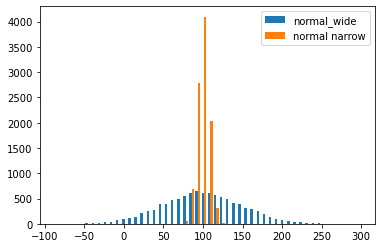

In [45]:
# Plot the wise and narrow data

plt.hist([normal_wide, normal_narrow], bins = 50, label=['normal_wide', 'normal narrow'])
plt.legend(loc='upper right')
plt.show()

### **uniform**

random.Generator.uniform(low=0.0, high=1.0, size=None)

A uniform distribution is continous distribution in which the probability is consistent throughout[x]. The data is generating by providing a lower and upper bound for the generated data to be drawn from. In this example the lower bound is 1 and the upper bound is 6.

In [48]:
# Generating 100 random floats between 1 and 6
uniform = rng.uniform(1,6,100)
uniform

array([2.90470506, 2.31359077, 1.8320805 , 2.88914275, 3.44988356,
       1.17594233, 5.70717928, 2.87821568, 1.40799273, 4.49751005,
       2.43086527, 5.97904834, 1.74633105, 1.09692607, 2.01046188,
       5.55548544, 5.1956777 , 1.2565407 , 1.83904521, 3.3792927 ,
       5.65636126, 4.81449799, 1.76122516, 3.97459186, 2.49422794,
       2.22334577, 4.33300608, 5.73559275, 2.4643709 , 2.33545226,
       2.97764379, 1.57082339, 4.73839317, 3.36407303, 3.36729591,
       4.49444586, 1.70081388, 2.86202252, 2.38024637, 2.74439194,
       2.36206455, 5.40699394, 3.64332245, 4.19943375, 5.45365984,
       3.41843423, 2.75247741, 3.70138652, 2.94422773, 4.15530866,
       1.89548097, 1.62936674, 5.64386706, 3.6114136 , 3.48008139,
       5.76532298, 5.56012686, 4.06755998, 2.33701524, 1.22384137,
       5.49626753, 2.52517836, 5.70057146, 5.87979329, 3.47901024,
       4.28374044, 5.33270858, 4.22380226, 4.06714865, 5.96814987,
       3.73929648, 1.7781779 , 1.11752901, 5.67074994, 2.75974

As a sample size of 100 is quite small, the resulting plot may not appear completely uniform due to chance, and the values tend to become more uniform as the sample size increases.

(array([21., 15., 20., 14.,  9., 21.]),
 array([1.08695835, 1.90230668, 2.71765501, 3.53300335, 4.34835168,
        5.16370001, 5.97904834]),
 <BarContainer object of 6 artists>)

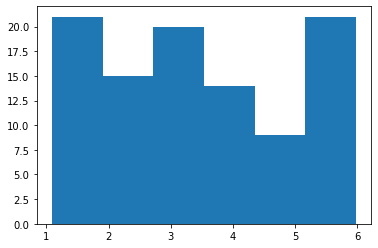

In [53]:
# Plotting the randomly generated uniform data
plt.hist(uniform, bins=6)

By increasing the sample size to 10000 we should expect the resulting data make more of a rectangular shape. 

(array([1613., 1616., 1760., 1669., 1652., 1690.]),
 array([1.00037849, 1.83364492, 2.66691135, 3.50017778, 4.33344421,
        5.16671064, 5.99997707]),
 <BarContainer object of 6 artists>)

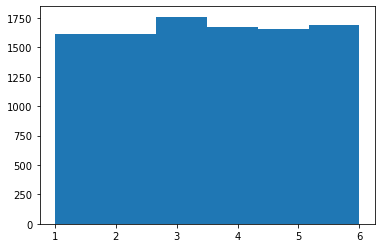

In [50]:
# Repeating the random generation with a higher sample size of 10000
uniform_higher = rng.uniform(1,6,10000)
plt.hist(uniform_higher, bins=6)

### **poisson**

random.Generator.poisson(lam=1.0, size=None)

A poisson distribution expresses the probability of a number of events within a particular timeframe [x]. An example might be if a business typically receives 5 orders an hour, with the typical value often being represented by the Greek letter lamba, we can derive the probabilty of the business receiving only 2 orders an hour, or 10 orders an hour. We can define a size to simulate the amount of times we want to draw a random sample from the distribution. In this instance, 500 datapoints will be generated.

In [62]:
# Generating random data from a poisson distribution
lamda = 5
poisson = rng.poisson(lamda, size=500)
poisson

array([ 5,  2,  8,  5,  5,  5, 10,  4,  5,  4,  4,  2, 10,  7,  4,  9,  6,
        3,  4,  9,  7,  3,  3,  6,  3,  3,  6,  4,  2,  4,  5,  5,  2,  5,
        5,  7,  8,  6,  2,  4,  5,  2,  3,  2,  4,  4,  6,  3,  6,  8,  5,
        5,  5,  4,  5,  3,  6,  5,  6,  6,  3,  5,  4,  8,  2,  5,  7,  5,
        8,  7,  9,  5,  9,  7,  5,  8,  6,  5,  6,  7, 12,  9,  4,  4,  3,
        7,  4, 10,  5,  3,  2,  5,  6,  7,  4,  3,  7,  4,  1,  5,  2,  3,
        5,  6,  2,  9,  4,  2,  8,  7,  5,  1,  6,  4,  6,  4,  2,  7,  7,
        5,  2,  7,  5,  7,  4,  4,  2,  6,  3,  5,  8,  5,  5,  5,  5,  6,
        2,  6,  4,  6,  6,  7,  5,  6,  3,  4,  5,  3,  6,  8,  3,  2,  4,
        2,  6,  6,  7,  3,  4,  1,  6,  5,  8,  2,  5,  2,  4,  8,  4,  2,
        1,  5,  4,  5,  4,  8,  4,  9,  6,  5,  5, 12,  4,  8,  4,  6,  9,
        8,  3,  2,  5,  5,  8,  3,  6,  5,  7,  9,  0,  2,  6,  9,  2,  5,
        2,  6,  4,  5,  8,  5,  3,  3,  6,  6,  3,  2,  6,  6,  4,  7,  4,
        3,  7,  3,  3,  3

(array([ 10.,  60., 140.,  76.,  90.,  90.,  18.,   8.,   4.,   4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

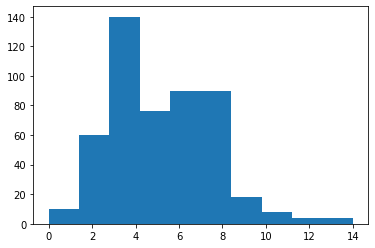

In [63]:
# Generate a plot of the random poisson data
plt.hist(poisson)

### **exponential**

random.Generator.exponential(scale=1.0, size=None)

An exponential distribution shows the distribution of the time between poisson events[x]. The distribution will have a peak at the point in which poisson events are most rare, and will become more steep as the events become more common, before levelling out again as events become more rare at the other end of the scale. 

In [69]:
# Generate random exponental data
scale = 5.0
exponential = rng.exponential(scale, size=100)
exponential

array([1.24766513e+00, 9.05772367e-01, 3.58928679e+00, 1.30983043e+01,
       1.37813701e+01, 5.38767141e+00, 5.80431115e+00, 3.21257399e+00,
       8.60358158e+00, 1.32469039e+01, 3.34594262e+00, 1.23668259e+01,
       1.20374989e+01, 1.43874748e+00, 1.28552162e+01, 8.73102445e+00,
       9.33894553e-01, 4.42388354e+00, 4.05145680e-02, 2.10417423e+00,
       1.70991386e+00, 1.08885157e+00, 9.65701824e-01, 2.74223932e+00,
       1.23680775e+00, 9.96675448e+00, 2.55995341e-01, 9.97252274e-01,
       8.05234571e-01, 3.25286793e+00, 8.74670856e-01, 7.36559520e+00,
       2.05546553e+00, 1.79521894e+01, 1.81698225e+01, 1.57540410e+00,
       8.47798483e+00, 1.13884864e+00, 2.35221126e+01, 1.64840633e+01,
       8.76700377e+00, 7.62192744e+00, 2.83324762e+00, 6.74057135e+00,
       7.20288484e+00, 6.07975630e+00, 5.64965325e-01, 9.67170566e+00,
       6.43048553e+00, 6.63275630e+00, 2.70386638e+01, 5.45329849e-01,
       3.00076412e-01, 2.90167481e+00, 5.97893318e+00, 2.08472179e-02,
      

(array([11., 13.,  6.,  7.,  5.,  4.,  2.,  3.,  7.,  4.,  8.,  2.,  9.,
         5.,  1.,  0.,  0.,  3.,  2.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.08472179e-02, 7.15529088e-01, 1.41021096e+00, 2.10489283e+00,
        2.79957470e+00, 3.49425657e+00, 4.18893844e+00, 4.88362031e+00,
        5.57830218e+00, 6.27298405e+00, 6.96766592e+00, 7.66234779e+00,
        8.35702966e+00, 9.05171153e+00, 9.74639340e+00, 1.04410753e+01,
        1.11357571e+01, 1.18304390e+01, 1.25251209e+01, 1.32198027e+01,
        1.39144846e+01, 1.46091665e+01, 1.53038484e+01, 1.59985302e+01,
        1.66932121e+01, 1.73878940e+01, 1.80825758e+01, 1.87772577e+01,
        1.94719396e+01, 2.01666214e+01, 2.08613033e+01, 2.15559852e+01,
        2.22506671e+01, 2.29453489e+01, 2.36400308e+01, 2.43347127e+01,
        2.50293945e+01, 2.57240764e+01, 2.64187583e+01, 2.71134401e+

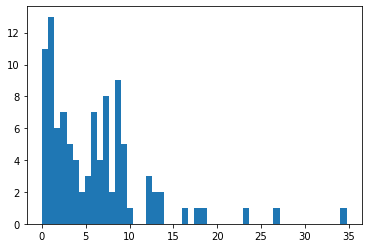

In [70]:
# Plot the randomly generated exponential data
plt.hist(exponential, bins=50)

In [71]:
# Repeating the random generation with a higher sample size of 10000
exponential_higher = rng.exponential(10.0, 10000)

(array([1.857e+03, 1.513e+03, 1.213e+03, 1.061e+03, 8.270e+02, 7.070e+02,
        5.470e+02, 4.000e+02, 3.590e+02, 2.870e+02, 2.370e+02, 2.050e+02,
        1.500e+02, 1.140e+02, 9.600e+01, 8.500e+01, 6.800e+01, 5.000e+01,
        3.500e+01, 4.500e+01, 2.400e+01, 2.500e+01, 2.100e+01, 1.800e+01,
        1.200e+01, 9.000e+00, 1.200e+01, 5.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([3.86444301e-04, 2.08233609e+00, 4.16428574e+00, 6.24623539e+00,
        8.32818504e+00, 1.04101347e+01, 1.24920843e+01, 1.45740340e+01,
        1.66559836e+01, 1.87379333e+01, 2.08198829e+01, 2.29018326e+01,
        2.49837822e+01, 2.70657319e+01, 2.91476815e+01, 3.12296312e+01,
        3.33115808e+01, 3.53935305e+01, 3.74754801e+01, 3.95574298e+01,
        4.163937

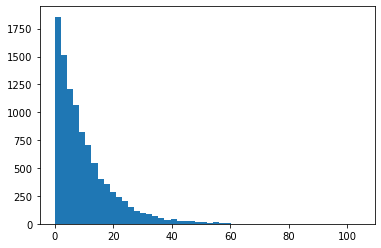

In [72]:
# As the sample size increases, the distribition becoms more smooth
plt.hist(exponential_higher, bins=50)

## Seeds
---

There are times when randomness needs to be predictable. For example, we may initially need a randomly generated dataset to test a model, but we would like to have repeated access to this data to be able to reproduce our findings. For this purpose, the pseudo-ness of using a computerised random number generator becomes a positive. Since the process is completely deterministic, we can ask for our result to be random but in a repeatable manner. This is where seeding comes in. By seeding a BitGenerator, we can get a random output that can be reproduced by others who use the same seed, BitGenerator, and code. If a seed is not entered by the user, the algorithm with use a default seed that constantly changes. An example of a default seed might be the current time and date, which is why the random data generate constantly changes each time it's run[x]. With a seed set by the user, the algorithm will generate random data using the seed presented as a starting point, ensuring a repeatable output.

In [61]:
# Calling the default rng but with a seed for reporoducable outcomes
rng_seeded1 = np.random.default_rng(seed=1246)
rng_seeded1.integers(5, size = 20)

array([4, 3, 1, 2, 1, 3, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 4, 3],
      dtype=int64)

In [62]:
# A new rng with the same seeding (1246) will result in the same output
rng_seeded2 = np.random.default_rng(seed=1246)
rng_seeded2.integers(5, size = 20)

array([4, 3, 1, 2, 1, 3, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 4, 3],
      dtype=int64)

### BitGenerators (PCG64 vs Mersenne Twister)

For many years the default BitGenerator for numpy.random was the Mersenne Twister BitGenerator[x]. It proved popular due to its widespread adoption and for most purposes proved to be robust and reliable, but in recent years it has begun to show its age[x]. There are some statistical vulnerabilities that, while unlikely to negatively affect the random outputs for most users, are not ideal. Furthermore, the large state associated with the algorithm means it is relatively slow and inefficient. As of NumPy 1.XX, the Mersenne Twister algorithm has been replaced as the default BitGenerator with PCG64, which promises to be faster and more statistically robust [x].

It's important to at least be aware of the default BitGenerater used by numpy.random because as pointed out by [X] the following code has different outcomes depending on the version of NumPy used and the default BitGenerator used at the time. While the code is short and easy to run, it can led to compatibility problems down the line. 

In [ ]:
np.random.seed(123)
np.random.randint(3, size=3)

One benefit instantiating a BitGenerator rather than using numpy.random.RandomState methods is that code may no longer be reproducible in the future should the default generator change. By initially instantiating a BitGenerator, one can easily go back and explicitly change the BitGenerator called. For example, we can call the old Mersenne Twister RNG instead of the default PCG64 if for some reason we would prefer to use it, for example, the code we wish to run was originally written with Mersenne Twister in mind by using the legacy random generation, which the developers guarantee will be frozen and no longer change, allowing reproducibility into the foreseeable future[X]. 

In [10]:
# Import the legacy Mersenne Twister Bit Generator
from numpy.random import RandomState

# Seeding the BitGenerator
rs = RandomState(12345)

# Generate a random, reproducable array of 3 ints between 0-10
rs.randint(10, size=3)

array([2, 5, 1])

Some of the methods are different for the legacy random generator so the separate documentation section for this feature should be referred to if it is going to be used[x]. 

We can also explicitly call for PCG64 should we be concerned that the default RNG changes in a future NumPy update. Doing so should hopefully help code to remain reproducible, in the instance where PCG64 is no longer the default BitGenerator, but it is still supported and callable by NumPy. 

In [17]:
# Explicitly call the PCG64 RNG, seeded to 32
from numpy.random import Generator, PCG64
rng = Generator(PCG64(seed=32))

# Generate a random, reproducable array of 3 ints between 0-10
rng.integers(10, size=3)

array([8, 1, 8], dtype=int64)

Other BitGenerators are also supported by NumPy should a user wish to use a different RNG[x].

## References

<b id="f1">1.</b> Singh, S., 2018. Understanding Random Variables. [online] Available at: <https://towardsdatascience.com/understanding-random-variable-a618a2e99b93> [Accessed 21 November 2021].[↩](#a1)
<b id="f2">2.</b> Wilson, J., 2019. Randomness for Modeling and Simulation. [online] Available at: <https://realpython.com/lessons/randomness-modeling-and-simulation/> [Accessed 21 November 2021].[↩](#a2)
